# Generation of Label Images

## Data sources
- iDigBio snapshot. I have a fresh one from a few days ago.
    - The problem here is that it's ~60G zipped. I can put it on DropBox but we should shrink this down to it's essential file and use that. It will still be large but hopefully more manageable.
- ITIS database: It's an SQLite3 database that is freely available for downloading.
https://www.itis.gov/downloads/itisSqlite.zip
- Fonts: This one is going to be problematic. We should download a consistent set.
    - I've been going for "distressed", "typewritten", and "pixel" fonts. The categories may overlap
    - We should be careful about the license for the fonts. I want to go for 100% free fonts or free for non-commercial use. "Personal use" may not apply?
- Possible use of handwriting samples that can be placed onto an image.

## Data Augmentation
- Use iDigBio data to generate text
- Also augment the data with ITIS data
- The data should be "plausible" for labels
- Where can I get handwriting samples?

### Text Augmentation
#### Things that can be finished to the text or font
- [ ] Underline some text: Use solid, dotted & dashed underlines, also strike-through or lines to the text
- [ ] Bold some text
- [ ] Use different base fonts and within the label change some fonts and sizes
- [ ] Use symbols like: ♀ or ♂ and other ones that may appear on labels
- [ ] Augment taxon names with data from ITIS
- [ ] Augment location data from gazetteer data
- [ ] Generate names dates and numbers
- [ ] Replace some words with abbreviations
- [ ] Add spaces? Lets see if this will work

### Image Augmentation
#### Things that have to be finished to the image
- [ ] Rotate image. This should be finished towards the end of augmentation.
- [ ] Rotate sections of text within the label
- [ ] Move text around the image (imperfect cropping)
- [ ] Warp the image
- [ ] Add stray marks & smudges
- [ ] Add snow especially near the edges of text
- [ ] Smear text with a kernel?
- [ ] Change background colors: white to off-white and a few with other colors
- [ ] Add gradients to the background. Maybe add a shadow?
- [ ] Fade the font: black to gray & rarely dark blue with opacity
- [ ] Use a gradient to fade text itself (Sobel kernel?)
- [ ] Add edges to labels. Do this both before and after rotating the image
- [ ] Simulate a bad typewriter by moving some letters up or over
- [ ] Add handwriting to the label
- [ ] Cross out some letters by covering with Xs or other characters. These are not considered text.
- [ ] Overlap some labels a bit. Not so much that they cover text.

In [1]:
import sys
from random import seed

In [2]:
sys.path.append('..')

In [3]:
from digi_leap.const import DB
from digi_leap.db import get_labels
from digi_leap.font import choose_label_fonts
from digi_leap.label_image import LabelImage
from digi_leap.log import finished, started

In [4]:
seed(4458)

In [5]:
labels = get_labels(DB, 'labels', 10)

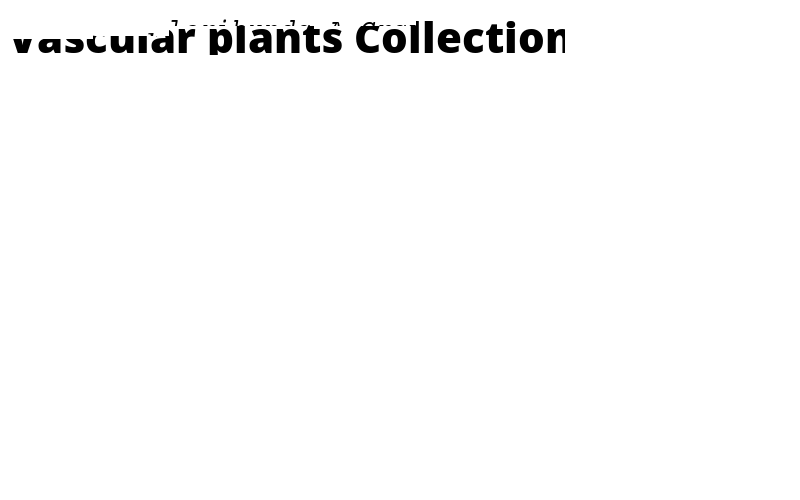

In [6]:
for key in labels.keys():
    label = LabelImage(labels[key])
    choose_label_fonts(label)
    label.layout()
    break

display(label.image)

#### This is a just an experiment to if it is easily possible to do this.

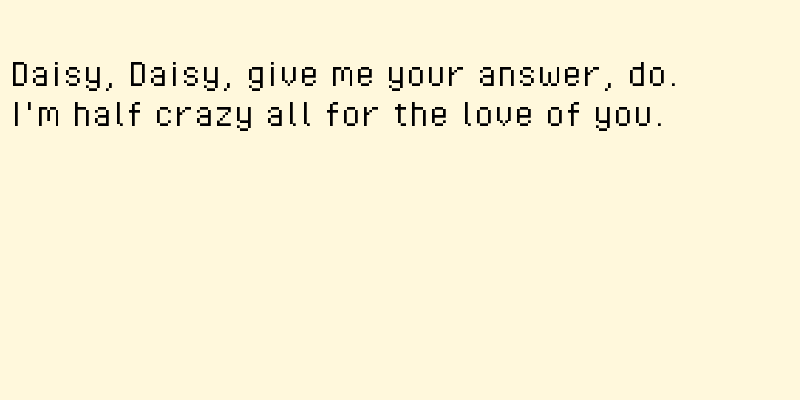

In [2]:
hal_9000 = """
Daisy, Daisy, give me your answer, do.
I'm half crazy all for the love of you.
"""

# I will use a symlink and a utility function here.
font = ImageFont.truetype('/home/rafe/.local/share/fonts/PixelOperator.ttf', 44)

image = Image.new(mode="RGB", size=(800, 400), color='cornsilk')

draw = ImageDraw.Draw(image)

draw.text((10, 10), hal_9000, font=font, fill='black')

display(image)